Avery Anderson kdu7bp Lab 1: Webscraping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://wausau.craigslist.org/search/port-edwards-wi/boo?lat=44.384&lon=-89.817&purveyor=owner&search_distance=178#search=1~gallery~0~0' # The page we want to scrape
raw = requests.get(url,headers=header) # Get page

In [2]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

In [42]:
import re
data = [] #save our listings in this object
types = ['jet ski', 'pontoon', 'fishing boat', 'canoe', 'kayak',]
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    words = title.split()
    hits = [word for word in words if word in types] # Find types in the title
    if len(hits) == 0:
        type = 'missing'
    else:
        type = hits[0]
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    data.append({'title':title,'price':price,'type':type, 'year':year,'link':link})

In [44]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
print(df.shape)
df.to_csv('/Users/averyanderson/Desktop/data/craigslist_wi_boats.csv') # Save data in case of a disaster
df.head()

(349, 5)


,title,price,type,year,link
0,cigarette 39 top gun,95000,missing,NaN,https://chicago.craigslist.org/nwc/boa/d/antio...
1,wenonah & northstar kevlar canoes - various mo...,12345,missing,NaN,https://eauclaire.craigslist.org/boa/d/menomon...
2,2010 lowe sd224 deck boat 150 mercury optimax ...,12500,missing,2010.0,https://chicago.craigslist.org/nwc/boa/d/barri...
3,lund boat,9500,missing,NaN,https://lacrosse.craigslist.org/boa/d/onalaska...
4,"16-0 aluminum,9,9 evinrude",900,missing,NaN,https://madison.craigslist.org/boa/d/hancock-1...


In [46]:
df.head(20)

,title,price,type,year,link
0,cigarette 39 top gun,95000,missing,NaN,https://chicago.craigslist.org/nwc/boa/d/antio...
1,wenonah & northstar kevlar canoes - various mo...,12345,missing,NaN,https://eauclaire.craigslist.org/boa/d/menomon...
2,2010 lowe sd224 deck boat 150 mercury optimax ...,12500,missing,2010.0,https://chicago.craigslist.org/nwc/boa/d/barri...
3,lund boat,9500,missing,NaN,https://lacrosse.craigslist.org/boa/d/onalaska...
4,"16-0 aluminum,9,9 evinrude",900,missing,NaN,https://madison.craigslist.org/boa/d/hancock-1...
5,74 240 sea ray twin screw,5500,missing,NaN,https://eauclaire.craigslist.org/boa/d/eau-cla...
6,96 sea ray bow rider 175 v-6 i/o,8000,missing,NaN,https://northernwi.craigslist.org/boa/d/three-...
7,1998 lowe / 1996 25 mercury,4750,missing,1998.0,https://rmn.craigslist.org/boa/d/reads-landing...
8,hobie cat 18 catamaran with trailer - harken-r...,3900,missing,NaN,https://northernwi.craigslist.org/boa/d/minocq...
9,multiple single and double place jet-ski trail...,600,missing,NaN,https://milwaukee.craigslist.org/boa/d/waukesh...


In [48]:
df['price'].unique()

array([     95000,      12345,      12500,       9500,        900,
             5500,       8000,       4750,       3900,        600,
             8500,          0,         75,          1,      24000,
            32500,      26200,        400,       1200,      14000,
             7995,       2000,       1850,         65,      13995,
            84995,       1875,        350,       2900,      15000,
            22000,      16800,       2500,      31000,      11000,
              520,        240,      25995,       1900,       1000,
               30,       1234,        500,       9800,      54995,
              250,       7900,       4500,        125,       3500,
             1500,       5995,       6900,       9995,       5900,
            12000,       1250,      14599,       2200,     139500,
             5800,        375,       3750,       9495,       1750,
             4000,       6000,     118000,      15900,       9750,
            13900,     999999,       6500,        200,       4

In [50]:
df = df[df['price'] != 7155058426]
df = df[df['price'] != 999999] #remove two major price outliers that were impacting data descriptions

In [52]:
df['price'].unique() #check that they were removed

array([ 95000,  12345,  12500,   9500,    900,   5500,   8000,   4750,
         3900,    600,   8500,      0,     75,      1,  24000,  32500,
        26200,    400,   1200,  14000,   7995,   2000,   1850,     65,
        13995,  84995,   1875,    350,   2900,  15000,  22000,  16800,
         2500,  31000,  11000,    520,    240,  25995,   1900,   1000,
           30,   1234,    500,   9800,  54995,    250,   7900,   4500,
          125,   3500,   1500,   5995,   6900,   9995,   5900,  12000,
         1250,  14599,   2200, 139500,   5800,    375,   3750,   9495,
         1750,   4000,   6000, 118000,  15900,   9750,  13900,   6500,
          200,   4900,  21900,  34500,    750,    800,  32490,  30500,
        18995,   1050,   1100,  14999,  20000,    300,  30000,     10,
          280,  19000,  18900,  17250,  37900,  32650,  17500,   3995,
         1400,  25500,  29900,    650,   1700,  21750,  15995,  17995,
        12995,  19995,  53099,  39299,  36299, 120999,      2,  17000,
      

count       346.000000
mean      13835.965318
std       21967.629905
min           0.000000
25%        1200.000000
50%        5900.000000
75%       17187.500000
max      139500.000000
Name: price, dtype: float64


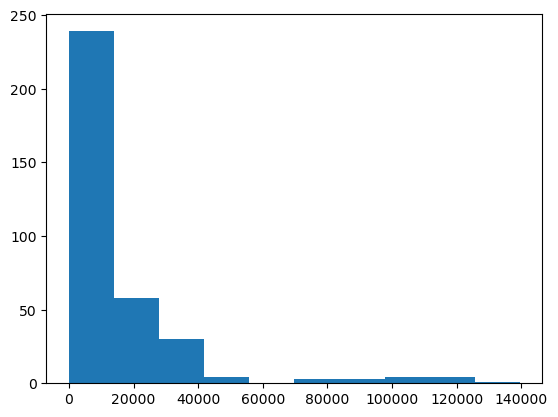

In [54]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [64]:
conditional =  (df['price']<= 20000) 
df_cheap = df[ conditional ] # Create new dataset with only boats $20,000 or less
df_cheap.head()

,title,price,type,year,link
1,wenonah & northstar kevlar canoes - various mo...,12345,missing,NaN,https://eauclaire.craigslist.org/boa/d/menomon...
2,2010 lowe sd224 deck boat 150 mercury optimax ...,12500,missing,2010.0,https://chicago.craigslist.org/nwc/boa/d/barri...
3,lund boat,9500,missing,NaN,https://lacrosse.craigslist.org/boa/d/onalaska...
4,"16-0 aluminum,9,9 evinrude",900,missing,NaN,https://madison.craigslist.org/boa/d/hancock-1...
5,74 240 sea ray twin screw,5500,missing,NaN,https://eauclaire.craigslist.org/boa/d/eau-cla...


count      274.000000
mean      5474.529197
std       5741.455345
min          0.000000
25%        800.000000
50%       3050.000000
75%       9246.250000
max      20000.000000
Name: price, dtype: float64


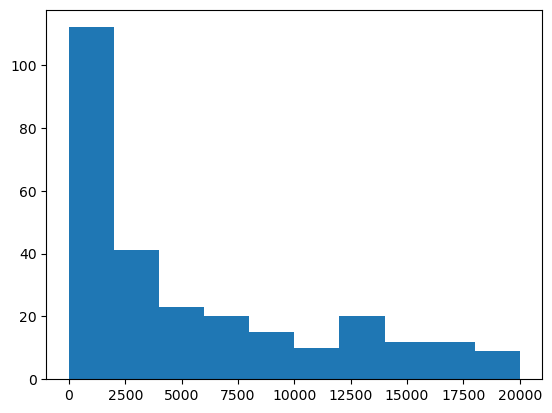

In [66]:
print(df_cheap['price'].describe())
df_cheap['price'].hist(grid=False)
plt.show()

count     165.000000
mean     1498.230303
std      1424.626518
min         0.000000
25%       325.000000
50%      1000.000000
75%      2200.000000
max      5000.000000
Name: price, dtype: float64


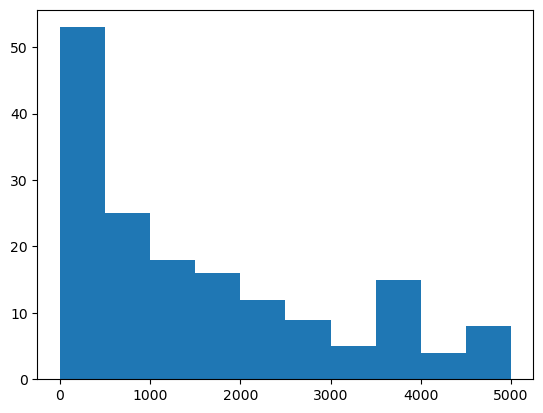

In [72]:
conditional =  (df['price']<= 5000) 
df_cheapest = df[ conditional ] # Create new dataset with only boats $5,000 or less
print(df_cheapest['price'].describe())
df_cheapest['price'].hist(grid=False)
plt.show()

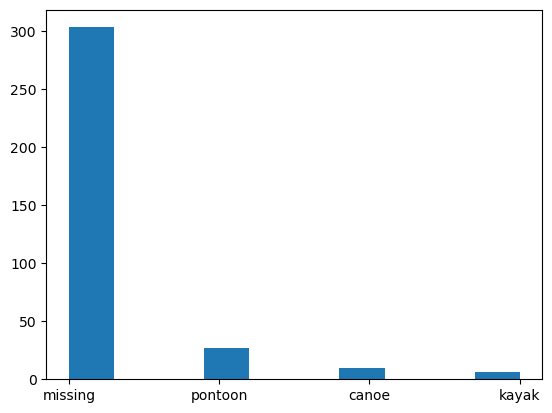

In [56]:
df['type'].hist(grid=False)
plt.show()

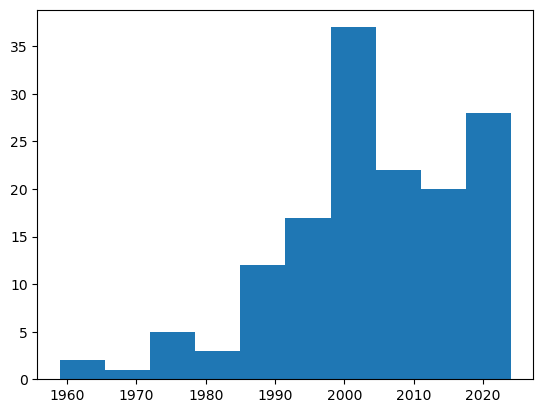

In [68]:
df['year'].hist(grid=False)
plt.show()

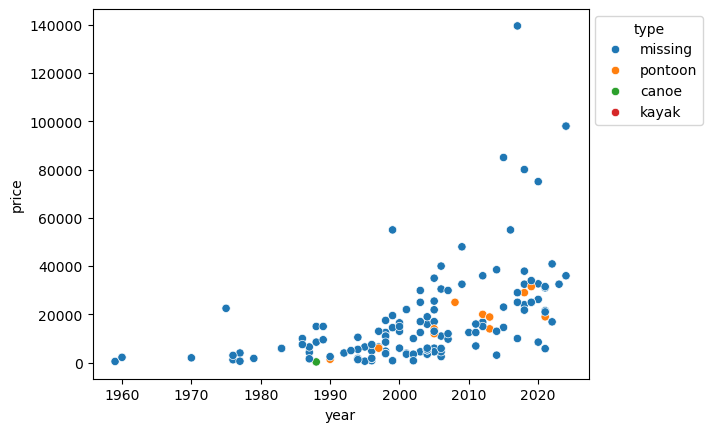

In [70]:
ax = sns.scatterplot(data=df, x='year', y='price',hue='type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [74]:
# price by year:
df_cheap.loc[:,['price','year']].groupby('year').describe()

price                                                                   \
       count          mean          std      min       25%      50%       75%   
year                                                                            
1959.0   1.0    500.000000          NaN    500.0    500.00    500.0    500.00   
1960.0   1.0   2200.000000          NaN   2200.0   2200.00   2200.0   2200.00   
1970.0   1.0   2000.000000          NaN   2000.0   2000.00   2000.0   2000.00   
1976.0   2.0   2100.000000  1272.792206   1200.0   1650.00   2100.0   2550.00   
1977.0   2.0   2300.000000  2404.163056    600.0   1450.00   2300.0   3150.00   
1979.0   1.0   1750.000000          NaN   1750.0   1750.00   1750.0   1750.00   
1983.0   2.0   5900.000000     0.000000   5900.0   5900.00   5900.0   5900.00   
1986.0   2.0   8750.000000  1767.766953   7500.0   8125.00   8750.0   9375.00   
1987.0   3.0   4116.666667  2452.719579   1600.0   2925.00   4250.0   5375.00   
1988.0   3.0   7933.000000  7365.885351    300.0   4400.00   8500.0  11749.50   
1989.0   2.0  12247.500000  3892.622830   9495.0  10871.25  12247.5  13623.75   
1990.0   2.0   1950.000000   777.817459   1400.0   1675.00   1950.0   2225.00   
1992.0   1.0   4000.000000          NaN   4000.0   4000.00   4000.0   4000.00   
1993.0   1.0   5000.000000          NaN   5000.0   5000.00   5000.0   5000.00   
1994.0   4.0   4749.500000  4276.369215   1250.0   1625.00   3624.5   6749.00   
1995.0   2.0   3550.000000  4171.930009    600.0   2075.00   3550.0   5025.00   
1996.0   6.0   3783.333333  2725.741489    800.0   1725.00   3350.0   5725.00   
1997.0   3.0   8496.666667  3899.363196   6000.0   6250.00   6500.0   9745.00   
1998.0   8.0   9093.750000  4867.783120   3750.0   4500.00   9750.0  11375.00   
1999.0   3.0  11600.000000  9681.425515    800.0   7650.00  14500.0  17000.00   
2000.0   4.0  12622.250000  4641.562982   6000.0  11250.00  13995.0  15367.25   
2001.0   2.0   3700.000000   282.842712   3500.0   3600.00   3700.0   3800.00   
2002.0   3.0   4763.333333  4723.455656    800.0   2150.00   3500.0   6745.00   
2003.0   3.0  11333.333333  6331.139971   4500.0   8500.00  12500.0  14750.00   
2004.0   9.0   7521.666667  5749.139066   3500.0   3900.00   5300.0   6000.00   
2005.0   6.0  11082.500000  4842.709727   4500.0   7496.25  12500.0  13750.00   
2006.0   4.0   5975.000000  3628.934646   2500.0   4000.00   5200.0   7175.00   
2007.0   2.0  10875.000000  1590.990258   9750.0  10312.50  10875.0  11437.50   
2010.0   1.0  12500.000000          NaN  12500.0  12500.00  12500.0  12500.00   
2011.0   3.0  11798.333333  4587.919826   6900.0   9700.00  12500.0  14247.50   
2012.0   3.0  17266.666667  2532.455988  15000.0  15900.00  16800.0  18400.00   
2013.0   2.0  16450.000000  3464.823228  14000.0  15225.00  16450.0  17675.00   
2014.0   2.0   8047.500000  6996.821600   3100.0   5573.75   8047.5  10521.25   
2015.0   1.0  14599.000000          NaN  14599.0  14599.00  14599.0  14599.00   
2017.0   1.0   9995.000000          NaN   9995.0   9995.00   9995.0   9995.00   
2020.0   1.0   8500.000000          NaN   8500.0   8500.00   8500.0   8500.00   
2021.0   2.0  12400.000000  9333.809512   5800.0   9100.00  12400.0  15700.00   
2022.0   1.0  16900.000000          NaN  16900.0  16900.00  16900.0  16900.00   

                 
            max  
year             
1959.0    500.0  
1960.0   2200.0  
1970.0   2000.0  
1976.0   3000.0  
1977.0   4000.0  
1979.0   1750.0  
1983.0   5900.0  
1986.0  10000.0  
1987.0   6500.0  
1988.0  14999.0  
1989.0  15000.0  
1990.0   2500.0  
1992.0   4000.0  
1993.0   5000.0  
1994.0  10499.0  
1995.0   6500.0  
1996.0   7500.0  
1997.0  12990.0  
1998.0  17500.0  
1999.0  19500.0  
2000.0  16499.0  
2001.0   3900.0  
2002.0   9990.0  
2003.0  17000.0  
2004.0  18995.0  
2005.0  17000.0  
2006.0  11000.0  
2007.0  12000.0  
2010.0  12500.0  
2011.0  15995.0  
2012.0  20000.0  
2013.0  18900.0  
2014.0  12995.0  
2015.0  14599.0  
2017.0   9995.0  
2

For this lab, I examined boats for sale in Wisconsin. From browing the site, it was pretty easy to see that descriptions of boats were all over the place in terms of what information they provided. While I tried to identify types of boats I saw a lot of, it was pretty inconsistent. Further, brands of boats were not clearly listed in the postings. Another clear observation from the data scraped is that prices were often missing. This could mean that the boat was truly free or that they forgot to add that to the listing. After a few data descriptions and plots, something I noticed was a spike in boats from around the year 2000, which I thought was interesting. Other patterns like newer boats being more expensive make sense. A spike in prices at around $4000 was also interesting and indicates that that may be a common price for used boats.